<img src="./img/championcurse.jpg" align="middle"></img>
<h1 align="middle" style="font-size: 30px; font-family:ariel-black">An Analysis of FIFA World Cup Champion's Curse</h1><br>
<h3 align="middle" style="font-family:ariel-black">Author: Yazeed Sobahi</h3><br>

<body>
    
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px"> FIFA World Cup is one of the most prestigious tournaments in the world. According to FIFA, more than half the world watched the 2018 World Cup held in Russia. For the 2022 championship, FIFA added 16 more teams to the tournament. </p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">In recent World Cup tournaments, viewers and sports media outlets noticed an unusual trend. A trend that would eventually be known as the "Champion's Curse" or "The World Cup Curse".</p>

<p align="left" style="font-size: 23px;"><b>What is the Champion's Curse?</b></p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Since 2002, winners of the World Cup would always be eliminated in the groups stage in the next World Cup. As an example, When France won the 1998 World Cup, they were eliminated in 2002 World Cup before advancing to the knockout stage. Most recent example is Germany, when they won the 2014 World Cup and were eliminated in the groups stage in 2018. This "curse" affected multiple title defenders throughout championships from 1998 to 2018. The only team that broke the curse was Brazil in 2004 after they won the 2002 World Cup. In the next World Cup they performed better than other championship defenders by reaching the knockout stage. (<a href="https://en.wikipedia.org/wiki/Sports-related_curses#World_Cup_champion%27s_Curse">read more</a>) </p>

<p align="left" style="font-size: 23px;"><b>The Attack Plan</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">In this project I attempt to find a logical reason behind this "curse". The goal is to compare the efficiency of the affected teams in world cup matches and international matches between each championship. I've decided to include Brazil even though they haven't been "cursed" for the purpose of comparison.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">The theory is that these teams (except maybe for Brazil) did not perform particularly well in their international matches after they won a World Cup championship, and before the next one.</p>
<hr>
<p align="left" style="font-size: 23px;"><b>Data Collection</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">I obtained the datasets from Kaggle. I found two datasets that collect data for international matches (Source: <a href="https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017">kaggle.com</a>) and World Cup matches (Source: <a href="https://www.kaggle.com/abecklas/fifa-world-cup">kaggle.com</a>).</p>

</body>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
plt.style.use('seaborn-poster')

world_cup = pd.read_csv("WorldCupMatches.csv")
intl_matches = pd.read_csv("results.csv")

<p align="left" style="font-size: 23px;"><b>Data Tidying & Processing</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now that I collected data from each dataset, I will perform the following steps to obtain the information I need: 

<ol align='left' style="font-size: 20px; font-family:georgia; line-height:30px">
    <li>Get data for each of the following teams from each database: Germany (GER), France (FRA), Brazil (BRA), Spain (ESP), and Italy (ITA)</li>
    <li>Dropping unnecessary columns and converting data to more convenient types (if necessary)</li>
    <li>Add a column for the winner of matches:
        <ul>
            <li>True: team being studied won the match by scoring more goals</li>
            <li>False: team being studied lost or tied the match</li>
        </ul>
    </li>
    <li>Create a new DataFrame to include success rate and number of goals for each team every year and every World Cup
        <ul>
            <li>Success Rate: Due to the way a "win" is counted above, success means completely overcoming the opposition by scoring most goals in a match</li>
            <li>Total Goals: Goals will be counted regardless of team's success over the opposition </li>
        </ul>
    </li>
</ol></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">
For this project, I'm considering a team to be more successful than thier opposition if they win the match by scoring more goals, this project does not take into account points gained for a draw in group matches of World Cup championships (where a draw can add more points to the team and help them advance to next stages). I'm also including an extra variable to hold specific information about Germany's international matches. More on this later.
</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">
I will also have to add 2018 World Cup matches information from the international matches dataset, since the World Cup matches dataset is missing last year's championship data.</p>

In [3]:
# obtaining data for individual teams from each dataset:

##########################################################
##### World Cup data for GER, FRA, BRA, ESP, and ITA #####
##########################################################

GER_wc = world_cup[(world_cup['Home Team Initials'] == "GER") | (world_cup['Away Team Initials'] == 'GER')]
FRA_wc = world_cup[(world_cup['Home Team Initials'] == "FRA") | (world_cup['Away Team Initials'] == 'FRA')]
BRA_wc = world_cup[(world_cup['Home Team Initials'] == "BRA") | (world_cup['Away Team Initials'] == 'BRA')]
ESP_wc = world_cup[(world_cup['Home Team Initials'] == "ESP") | (world_cup['Away Team Initials'] == 'ESP')]
ITA_wc = world_cup[(world_cup['Home Team Initials'] == "ITA") | (world_cup['Away Team Initials'] == 'ITA')]

# droppping unused columns

GER_wc = GER_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'Home Team Initials', 'Away Team Initials'], axis=1)
FRA_wc = FRA_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'Home Team Initials', 'Away Team Initials'], axis=1)
BRA_wc = BRA_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'Home Team Initials', 'Away Team Initials'], axis=1)
ESP_wc = ESP_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'Home Team Initials', 'Away Team Initials'], axis=1)
ITA_wc = ITA_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'Home Team Initials', 'Away Team Initials'], axis=1)

# converting year, home team goals and away team goals from float to int
GER_wc['Year'] = GER_wc['Year'].astype('int') 
GER_wc['Home Team Goals'] = GER_wc['Home Team Goals'].astype('int') 
GER_wc['Away Team Goals'] = GER_wc['Away Team Goals'].astype('int') 

FRA_wc['Year'] = FRA_wc['Year'].astype('int') 
FRA_wc['Home Team Goals'] = FRA_wc['Home Team Goals'].astype('int') 
FRA_wc['Away Team Goals'] = FRA_wc['Away Team Goals'].astype('int')  

BRA_wc['Year'] = BRA_wc['Year'].astype('int')
BRA_wc['Home Team Goals'] = BRA_wc['Home Team Goals'].astype('int') 
BRA_wc['Away Team Goals'] = BRA_wc['Away Team Goals'].astype('int') 

ESP_wc['Year'] = ESP_wc['Year'].astype('int')
ESP_wc['Home Team Goals'] = ESP_wc['Home Team Goals'].astype('int') 
ESP_wc['Away Team Goals'] = ESP_wc['Away Team Goals'].astype('int') 

ITA_wc['Year'] = ITA_wc['Year'].astype('int') 
ITA_wc['Home Team Goals'] = ITA_wc['Home Team Goals'].astype('int') 
ITA_wc['Away Team Goals'] = ITA_wc['Away Team Goals'].astype('int')  

# adding a column for winner:
# True: if team being studied won, False: if team being studied lost or tied

GER_wc['Winner'] = ((GER_wc['Home Team Name'] == 'Germany') & (GER_wc['Home Team Goals'] > GER_wc['Away Team Goals'])) | ((GER_wc['Away Team Name'] == 'Germany') & (GER_wc['Away Team Goals'] > GER_wc['Home Team Goals']))
FRA_wc['Winner'] = ((FRA_wc['Home Team Name'] == 'France') & (FRA_wc['Home Team Goals'] > FRA_wc['Away Team Goals'])) | ((FRA_wc['Away Team Name'] == 'France') & (FRA_wc['Away Team Goals'] > FRA_wc['Home Team Goals']))
BRA_wc['Winner'] = ((BRA_wc['Home Team Name'] == 'Brazil') & (BRA_wc['Home Team Goals'] > BRA_wc['Away Team Goals'])) | ((BRA_wc['Away Team Name'] == 'Brazil') & (BRA_wc['Away Team Goals'] > BRA_wc['Home Team Goals']))
ESP_wc['Winner'] = ((ESP_wc['Home Team Name'] == 'Spain') & (ESP_wc['Home Team Goals'] > ESP_wc['Away Team Goals'])) | ((ESP_wc['Away Team Name'] == 'Spain') & (ESP_wc['Away Team Goals'] > ESP_wc['Home Team Goals']))
ITA_wc['Winner'] = ((ITA_wc['Home Team Name'] == 'Italy') & (ITA_wc['Home Team Goals'] > ITA_wc['Away Team Goals'])) | ((ITA_wc['Away Team Name'] == 'Italy') & (ITA_wc['Away Team Goals'] > ITA_wc['Home Team Goals']))

GER_wc.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,MatchID,Winner
22,1934,Germany,5,2,Belgium,1108.0,True
27,1934,Germany,2,1,Sweden,1129.0,True
32,1934,Czechoslovakia,3,1,Germany,1130.0,False
33,1934,Germany,3,2,Austria,1105.0,True
35,1938,Switzerland,1,1,Germany,1165.0,False


In [4]:
######################################################################
##### International matches data for GER, FRA, BRA, ESP, and ITA #####
######################################################################

GER_intl = intl_matches[(intl_matches['home_team'] == "Germany") | (intl_matches['away_team'] == 'Germany')]
FRA_intl = intl_matches[(intl_matches['home_team'] == "France") | (intl_matches['away_team'] == 'France')]
BRA_intl = intl_matches[(intl_matches['home_team'] == "Brazil") | (intl_matches['away_team'] == 'Brazil')]
ESP_intl = intl_matches[(intl_matches['home_team'] == "Spain") | (intl_matches['away_team'] == 'Spain')]
ITA_intl = intl_matches[(intl_matches['home_team'] == "Italy") | (intl_matches['away_team'] == 'Italy')]

# droppping unused columns

GER_intl = GER_intl.drop(['city', 'neutral'], axis=1)
FRA_intl = FRA_intl.drop(['city', 'neutral'], axis=1)
BRA_intl = BRA_intl.drop(['city', 'neutral'], axis=1)
ESP_intl = ESP_intl.drop(['city', 'neutral'], axis=1)
ITA_intl = ITA_intl.drop(['city', 'neutral'], axis=1)

# adding a column for winner:
# True: if team being studied won, False: if team being studied lost or tied

GER_intl['Winner'] = ((GER_intl['home_team'] == 'Germany') & (GER_intl['home_score'] > GER_intl['away_score'])) | ((GER_intl['away_team'] == 'Germany') & (GER_intl['away_score'] > GER_intl['home_score']))
FRA_intl['Winner'] = ((FRA_intl['home_team'] == 'France') & (FRA_intl['home_score'] > FRA_intl['away_score'])) | ((FRA_intl['away_team'] == 'France') & (FRA_intl['away_score'] > FRA_intl['home_score']))
BRA_intl['Winner'] = ((BRA_intl['home_team'] == 'Brazil') & (BRA_intl['home_score'] > BRA_intl['away_score'])) | ((BRA_intl['away_team'] == 'Brazil') & (BRA_intl['away_score'] > BRA_intl['home_score']))
ESP_intl['Winner'] = ((ESP_intl['home_team'] == 'Spain') & (ESP_intl['home_score'] > ESP_intl['away_score'])) | ((ESP_intl['away_team'] == 'Spain') & (ESP_intl['away_score'] > ESP_intl['home_score']))
ITA_intl['Winner'] = ((ITA_intl['home_team'] == 'Italy') & (ITA_intl['home_score'] > ITA_intl['away_score'])) | ((ITA_intl['away_team'] == 'Italy') & (ITA_intl['away_score'] > ITA_intl['home_score']))

# 2018 World Cup data
GER_2018 = pd.DataFrame(GER_intl[(GER_intl.tournament == "FIFA World Cup") & (GER_intl.country == "Russia")])
FRA_2018 = pd.DataFrame(FRA_intl[(FRA_intl.tournament == "FIFA World Cup") & (FRA_intl.country == "Russia")])
BRA_2018 = pd.DataFrame(BRA_intl[(BRA_intl.tournament == "FIFA World Cup") & (BRA_intl.country == "Russia")])
ESP_2018 = pd.DataFrame(ESP_intl[(ESP_intl.tournament == "FIFA World Cup") & (ESP_intl.country == "Russia")])
ITA_2018 = pd.DataFrame(ITA_intl[(ITA_intl.tournament == "FIFA World Cup") & (ITA_intl.country == "Russia")])


# Temporary variable to keep specific data on Germany's international matches
w_GER = pd.DataFrame(GER_intl[GER_intl['tournament'] == "FIFA World Cup"])

# removing World Cup matches from each dataset (goals in World Cup already computed in other datasets)
GER_intl = GER_intl[GER_intl['tournament'] != "FIFA World Cup"]
FRA_intl = FRA_intl[FRA_intl['tournament'] != "FIFA World Cup"]
BRA_intl = BRA_intl[BRA_intl['tournament'] != "FIFA World Cup"]
ESP_intl = ESP_intl[ESP_intl['tournament'] != "FIFA World Cup"]
ITA_intl = ITA_intl[ITA_intl['tournament'] != "FIFA World Cup"]

ITA_intl.head()

,date,home_team,away_team,home_score,away_score,tournament,country,Winner
258,5/15/1910,Italy,France,6,2,Friendly,Italy,True
260,5/26/1910,Hungary,Italy,6,1,Friendly,Hungary,False
273,1/6/1911,Italy,Hungary,0,1,Friendly,Italy,False
284,4/9/1911,France,Italy,2,2,Friendly,France,False
289,5/7/1911,Italy,Switzerland,2,2,Friendly,Italy,False


In [5]:
# this function will collect team's international goals in one column
def getIntlGoals(data, team):
    for i, row in data.iterrows():
        if(row['home_team'] == team):
            data.loc[i, 'Goals'] = row['home_score']
        else:
            data.loc[i, 'Goals'] = row['away_score']
        
# this function has the same purpose for World Cup matches
def getWCGoals(data, team):
    for i, row in data.iterrows():
        if(row['Home Team Name'] == team):
            data.loc[i, 'Goals'] = row['Home Team Goals']
        else:
            data.loc[i, 'Goals'] = row['Away Team Goals']


getIntlGoals(GER_intl, 'Germany')
getIntlGoals(FRA_intl, 'France')
getIntlGoals(BRA_intl, 'Brazil')
getIntlGoals(ESP_intl, 'Spain')
getIntlGoals(ITA_intl, 'Italy')

# temp Germany dataset
getIntlGoals(w_GER, 'Germany')

# 2018 World Cup data
getIntlGoals(GER_2018, 'Germany')
getIntlGoals(FRA_2018, 'France')
getIntlGoals(BRA_2018, 'Brazil')
getIntlGoals(ESP_2018, "Spain")
getIntlGoals(ITA_2018, "Italy")

getWCGoals(GER_wc, 'Germany')
getWCGoals(FRA_wc, 'France')
getWCGoals(BRA_wc, 'Brazil')
getWCGoals(ESP_wc, 'Spain')
getWCGoals(ITA_wc, 'Italy')
            
# this function will add a new column for the year in the international matches datasets
def getYear(data):
    for i, row in data.iterrows():
        data.loc[i, 'Year'] = int(row['date'][-4:])

getYear(GER_intl)
getYear(FRA_intl)
getYear(BRA_intl)
getYear(ESP_intl)
getYear(ITA_intl)

# temp Germany dataset
getYear(w_GER)

# 2018 World Cup data
getYear(GER_2018)
getYear(FRA_2018)
getYear(BRA_2018)
getYear(ESP_2018)
getYear(ITA_2018)

GER_intl.head()

,date,home_team,away_team,home_score,away_score,tournament,country,Winner,Goals,Year
209,4/5/1908,Switzerland,Germany,5,3,Friendly,Switzerland,False,3.0,1908.0
216,6/7/1908,Austria,Germany,3,2,Friendly,Austria,False,2.0,1908.0
234,4/4/1909,Germany,Switzerland,1,0,Friendly,Germany,True,1.0,1909.0
235,4/4/1909,Hungary,Germany,3,3,Friendly,Hungary,False,3.0,1909.0
253,4/3/1910,Switzerland,Germany,2,3,Friendly,Switzerland,True,3.0,1910.0


<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now that I have a dataset for each team's number of goals in one column and a year column for international matches, I can remove all columns and keep the year, team's win mark, and number of goals. And from this dataset, I'll create a dataset to include team's success rate and total number of goals in one DataFrame</p>

In [6]:
# World Cup column drops
GER_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
FRA_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
BRA_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
ESP_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
ITA_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)

# International matches column drops
GER_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
FRA_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
BRA_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
ESP_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
ITA_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)

# resetting indexes
GER_wc.reset_index(drop=True, inplace=True)
FRA_wc.reset_index(drop=True, inplace=True)
BRA_wc.reset_index(drop=True, inplace=True)
ESP_wc.reset_index(drop=True, inplace=True)
ITA_wc.reset_index(drop=True, inplace=True)

GER_intl.reset_index(drop=True, inplace=True)
FRA_intl.reset_index(drop=True, inplace=True)
BRA_intl.reset_index(drop=True, inplace=True)
ESP_intl.reset_index(drop=True, inplace=True)
ITA_intl.reset_index(drop=True, inplace=True)

# temp Germany dataset
w_GER.reset_index(drop=True, inplace=True)

# 2018 World Cup data
GER_2018.reset_index(drop=True, inplace=True)
FRA_2018.reset_index(drop=True, inplace=True)
BRA_2018.reset_index(drop=True, inplace=True)
ESP_2018.reset_index(drop=True, inplace=True)
ITA_2018.reset_index(drop=True, inplace=True)

GER_wc.head()

,Year,MatchID,Winner,Goals
0,1934,1108.0,True,5.0
1,1934,1129.0,True,2.0
2,1934,1130.0,False,1.0
3,1934,1105.0,True,3.0
4,1938,1165.0,False,1.0


In [7]:
# Now to create DataFrames for each team's performance every year and every World Cup
columns = ['Year', 'Team', 'Success Rate', 'Total Goals']

# function to add information (Total Goals and Success Rate) to the team's overall dataset in World Cup championships
def getData(data, og_data, team):
    for i, row in og_data.iterrows():
        data.loc[i, 'Year'] = row['Year']
        data.loc[i, 'Success Rate'] = (len(og_data[(og_data['Year'] == row['Year']) & (og_data['Winner'])]) / len(og_data[og_data['Year'] == row['Year']])) * 100
        data.loc[i, 'Total Goals'] = og_data[og_data['Year'] == row['Year']]['Goals'].sum()
        data['Team'] = team
        
###############################
##### World Cup datasets ######
###############################

GER_wc_wr = pd.DataFrame(columns=columns)
FRA_wc_wr = pd.DataFrame(columns=columns)
BRA_wc_wr = pd.DataFrame(columns=columns)
ESP_wc_wr = pd.DataFrame(columns=columns)
ITA_wc_wr = pd.DataFrame(columns=columns)

# adding success rate and goals information to World Cup datasets
getData(GER_wc_wr, GER_wc, 'Germany')
getData(FRA_wc_wr, FRA_wc, 'France')
getData(BRA_wc_wr, BRA_wc, 'Brazil')
getData(ESP_wc_wr, ESP_wc, 'Spain')
getData(ITA_wc_wr, ITA_wc, 'Italy')        
        
# removing duplicates
GER_wc_wr.drop_duplicates(inplace=True)
FRA_wc_wr.drop_duplicates(inplace=True)
BRA_wc_wr.drop_duplicates(inplace=True)
ESP_wc_wr.drop_duplicates(inplace=True)
ITA_wc_wr.drop_duplicates(inplace=True)

# now to create the overall dataset for all teams
datasets = [GER_wc_wr, FRA_wc_wr, BRA_wc_wr, ESP_wc_wr, ITA_wc_wr]
wc = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)

wc.sample(10)

,Year,Team,Success Rate,Total Goals
45,1994,Italy,57.142857,8.0
60,2006,Brazil,80.0,10.0
51,1998,Italy,60.0,8.0
70,2014,Brazil,36.363636,15.0
25,1966,Brazil,33.333333,4.0
12,1950,Spain,50.0,10.0
27,1970,Italy,50.0,10.0
3,1934,Spain,33.333333,4.0
29,1974,Italy,33.333333,5.0
14,1954,Brazil,33.333333,8.0


In [8]:
##########################################
##### International Matches datasets #####
##########################################

GER_intl_wr = pd.DataFrame(columns=columns)
FRA_intl_wr = pd.DataFrame(columns=columns)
BRA_intl_wr = pd.DataFrame(columns=columns)
ESP_intl_wr = pd.DataFrame(columns=columns)
ITA_intl_wr = pd.DataFrame(columns=columns)

# temp Germany dataset
w_GER_wr = pd.DataFrame(columns=columns)

# 2018 Word Cup datasets
GER_2018_wr = pd.DataFrame(columns=columns)
FRA_2018_wr = pd.DataFrame(columns=columns)
BRA_2018_wr = pd.DataFrame(columns=columns)
ESP_2018_wr = pd.DataFrame(columns=columns)
ITA_2018_wr = pd.DataFrame(columns=columns)

# adding success rate and goals information to international matches datasets
getData(GER_intl_wr, GER_intl, 'Germany')
getData(FRA_intl_wr, FRA_intl, 'France')
getData(BRA_intl_wr, BRA_intl, 'Brazil')
getData(ESP_intl_wr, ESP_intl, 'Spain')
getData(ITA_intl_wr, ITA_intl, 'Italy')

# temp Germany dataset
getData(w_GER_wr, w_GER, 'Germany')

# 2018 World Cup data
getData(GER_2018_wr, GER_2018, 'Germany')
getData(FRA_2018_wr, FRA_2018, 'France')
getData(BRA_2018_wr, BRA_2018, 'Brazil')
getData(ESP_2018_wr, ESP_2018, 'Spain')
getData(ITA_2018_wr, ITA_2018, 'Italy')

# removing duplicates
GER_intl_wr.drop_duplicates(inplace=True)
FRA_intl_wr.drop_duplicates(inplace=True)
BRA_intl_wr.drop_duplicates(inplace=True)
ESP_intl_wr.drop_duplicates(inplace=True)
ITA_intl_wr.drop_duplicates(inplace=True)

# temp Germany dataset
w_GER_wr.drop_duplicates(inplace=True)

# 2018 World Cup data
GER_2018_wr.drop_duplicates(inplace=True)
FRA_2018_wr.drop_duplicates(inplace=True)
BRA_2018_wr.drop_duplicates(inplace=True)
ESP_2018_wr.drop_duplicates(inplace=True)
ITA_2018_wr.drop_duplicates(inplace=True)

# now to create the overall dataset for all teams
datasets = [GER_intl_wr, FRA_intl_wr, BRA_intl_wr, ESP_intl_wr, ITA_intl_wr]
intl = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)

# adding 2018 World Cup data to wc dataset and to each team's dataset
datasets = [wc, GER_2018_wr, FRA_2018_wr, BRA_2018_wr, ESP_2018_wr, ITA_2018_wr]
wc = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)

GER_wc_wr = pd.concat([GER_2018_wr, GER_wc_wr]).sort_values(by='Year').reset_index(drop=True)
FRA_wc_wr = pd.concat([FRA_2018_wr, FRA_wc_wr]).sort_values(by='Year').reset_index(drop=True)
BRA_wc_wr = pd.concat([BRA_2018_wr, BRA_wc_wr]).sort_values(by='Year').reset_index(drop=True)
ESP_wc_wr = pd.concat([ESP_2018_wr, ESP_wc_wr]).sort_values(by='Year').reset_index(drop=True)
ITA_wc_wr = pd.concat([ITA_2018_wr, ITA_wc_wr]).sort_values(by='Year').reset_index(drop=True)

intl.sample(10)

,Year,Team,Success Rate,Total Goals
28,1919.0,Brazil,60.0,15.0
66,1928.0,Italy,57.142857,17.0
317,1983.0,Brazil,35.714286,21.0
309,1981.0,Brazil,75.0,36.0
185,1956.0,France,60.0,12.0
4,1908.0,Germany,0.0,5.0
231,1966.0,Germany,87.5,18.0
244,1968.0,Brazil,65.0,52.0
421,2004.0,Brazil,47.368421,41.0
99,1935.0,Germany,76.470588,48.0


<p align="left" style="font-size: 23px;"><b>Special Case: West Germany</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Germany is a special case. There is a big gap in its World Cup matches data from 1938 to 1994. This is because during the Cold War era, Germany participated in the World Cup as West Germany, and the World Cup matches dataset is missing that information. Luckily, the international matches dataset has the missing data. For the purpose of this project I will consider them to be one country. So I will add them to the World Cup dataset. I have been performing all the steps on a temporary variable I called "w_GER" for this reason. All I have to do is merge it with the dataset I created for the World Cup.</p>

In [9]:
##################################
##### Germany's Special Case #####
##################################

# getting World Cup matches data from 1938 to 1990
tmp = pd.DataFrame(w_GER_wr[(w_GER_wr['Year'] > 1934) & (w_GER_wr['Year'] < 1994)])

# merging the two datasets
datasets = [wc, tmp]
wc = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)
wc.drop_duplicates(inplace=True)

print("Missing data:")
tmp

Missing data:


,Year,Team,Success Rate,Total Goals
4,1938.0,Germany,0.0,3.0
6,1954.0,Germany,83.333333,25.0
12,1958.0,Germany,33.333333,12.0
18,1962.0,Germany,50.0,4.0
22,1966.0,Germany,66.666667,15.0
28,1970.0,Germany,83.333333,17.0
34,1974.0,Germany,85.714286,13.0
41,1978.0,Germany,16.666667,10.0
47,1982.0,Germany,42.857143,12.0
54,1986.0,Germany,42.857143,8.0


<p align="left" style="font-size: 23px;"><b>Data Visualization</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now I have two datasets that include information about each team's success rate and total number of goals every year for international matches and World Cup matches. It is time to plot some data to look for trends and patterns. I will produce plots for the following: 
<ul align='left' style="font-size: 20px; font-family:georgia; line-height:30px"><li>Team's success rate against each other in international matches and World Cups</li><li>Goals vs. Success Rate for each team in international matches and World Cups</li></ul></p>

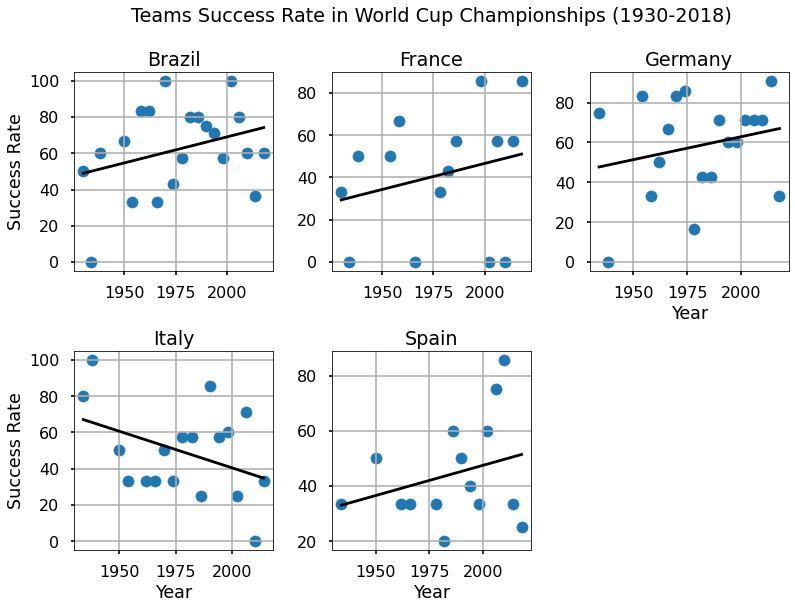

In [14]:
#################################
#####   World Cup plots     #####
##### Success Rate vs. Year #####
#################################

# converting numerical values to np.float64 for the purposes of linear regression analysis
wc['Success Rate'] = np.asarray(wc['Success Rate'], dtype=np.float64)
intl['Success Rate'] = np.asarray(intl['Success Rate'], dtype=np.float64)
wc['Year'] = np.asarray(wc['Year'], dtype=np.int)
intl['Year'] = np.asarray(intl['Year'], dtype=np.int)
wc['Total Goals'] = np.asarray(wc['Total Goals'], dtype=np.int)
intl['Total Goals'] = np.asarray(intl['Total Goals'], dtype=np.int)

# making the plots
wc_fig = plt.figure(1)
i = 231

for team in np.unique(wc['Team'].values):
    data = wc[wc['Team'] == team]
    plt.subplot(i)
    plt.scatter(data['Year'], data['Success Rate'], label=team)
    plt.title(team)
    plt.grid(True)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'], data['Success Rate'])
    plt.plot(data['Year'], intercept + slope * data['Year'], 'black')
    if(i == 232):
        plt.title("Teams Success Rate in World Cup Championships (1930-2018)\n\n" + team)
    if(i == 231 or i == 234):
        plt.ylabel("Success Rate")
    if(i == 233 or i == 234 or i == 235):
        plt.xlabel("Year") 
    i += 1

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">It is clear from these plots that Brazil has better success rates over the years compared to other teams. Their success rate never goes below %33 after 1938. They also had a %100 success rate in the years 1970 and 2002, in which Brazil had won the World Cup. It is no surprise that success rate has a direct correlation with winning the World Cup.</p> 
    
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px"> Germany also has a generally high success rate. After the large dip in 1978, Germany had seen a steady improvment in their success rate.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">It is worth mentioning that Italy did not make it to the 2018 World Cup because they were not qualified, and Germany did not participate in 1950. And that the World Cup was cancelled entirely in 1942 and 1946 due to the Second World War (<a href="https://theculturetrip.com/europe/germany/articles/why-wasnt-there-a-world-cup-in-1942-or-1946/">read more</a>)</p>
    
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">These plots also tell us about the performance of each team at the World Cup. While most of them have increased performnce every World Cup, It seems like Italy's performance has been declining.</p>


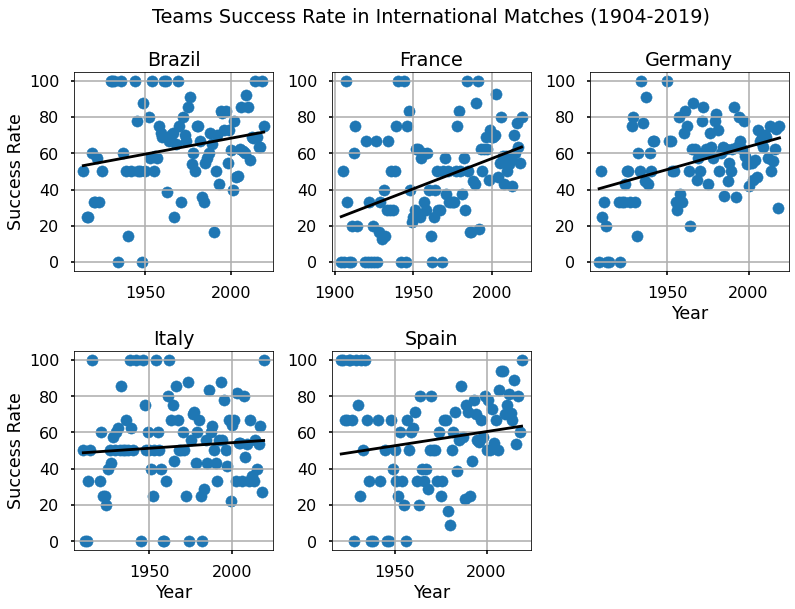

In [15]:
#########################################
#####  International Matches plots  #####
#####    Success Rate vs. Year      #####
#########################################

i = 231
for team in np.unique(wc['Team'].values):
    plt.subplot(i)
    data = intl[intl['Team'] == team]
    plt.scatter(data['Year'], data['Success Rate'], label=team)
    plt.title(team)    
    plt.grid(True)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'], data['Success Rate'])
    plt.plot(data['Year'], intercept + slope * data['Year'], 'black')
    if(i == 232):
        plt.title("Teams Success Rate in International Matches (1904-2019)\n\n" + team)
    if(i == 231 or i == 234):
        plt.ylabel("Success Rate")
    if(i == 233 or i == 234 or i == 235):
        plt.xlabel("Year") 
    i += 1

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">In international matches outside of the World Cup, it seems like Italy performs better. While Germany and France have a higher rate of increased success rate.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Next, I would like to look into the relationship between number of total goals and success rate. I expect there will be a relationship between the variables. As a team scores more goals, they're must likely winning.</p>

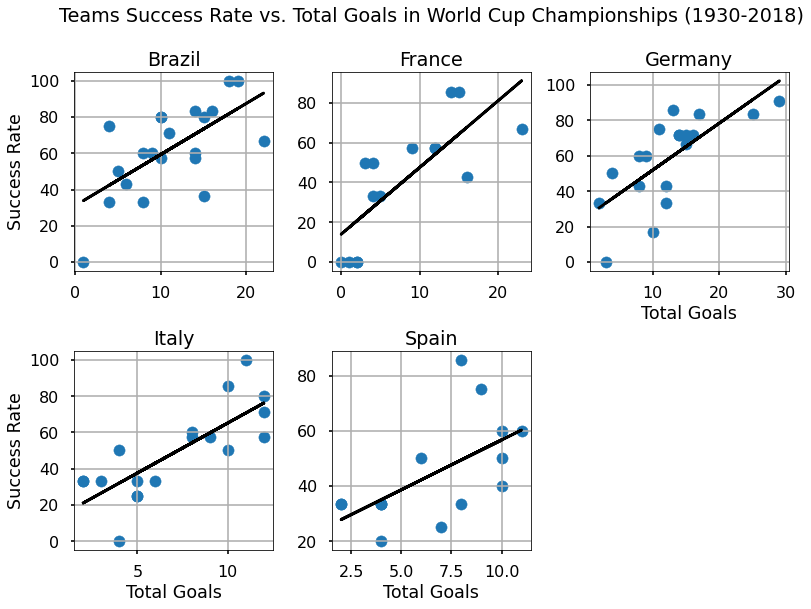

In [16]:
##################################
#####    World Cup plots     #####
##### Success Rate vs. Goals #####
##################################

i = 231
for team in np.unique(wc['Team'].values):
    plt.subplot(i)
    data = wc[wc['Team'] == team]
    plt.scatter(data['Total Goals'], data['Success Rate'], label=data['Year'])
    plt.title(team)   
    plt.grid(True) 
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Total Goals'], data['Success Rate'])
    plt.plot(data['Total Goals'], intercept + slope * data['Total Goals'], 'black')
    if(i == 232):
        plt.title("Teams Success Rate vs. Total Goals in World Cup Championships (1930-2018)\n\n" + team)
    if(i == 231 or i == 234):
        plt.ylabel("Success Rate")
    if(i == 233 or i == 234 or i == 235):
        plt.xlabel("Total Goals") 
    i += 1

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">As the figures above show, a team is mostly successful against their opposition if they score more goals per year. However, with how success is counted and defined in this project, it also means that if a team with a lot of goals per year is not necessarily successful.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">A good example is Spain. As the plot shows, they scored more than 7 goals in multiple World Cup championships. However, in some of these World Cups, their success rate is %40 or less. What this means is that while Spain scored more goals for them, they also let other teams score against them. A team's performance shouldn't be about winning offensively only. The team should also be able to defend. This is what it means for a team to be successful.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">The next step is to analyze each team's performance in international matches by finding the success rate of each team only in the years before the World Cup where they get affected by the "curse". The years I'll be analyzing for each team will be:</p>

<ul align='left' style="font-size: 20px; font-family:georgia; line-height:30px">
<li>Germany: 2015 to 2018 (50 matches)</li>
<li>France: 1999 to 2002 (50 matches)</li>
<li>Brazil: 2003 to 2006 (59 matches)</li>
<li>Spain: 2011 to 2014 (54 matches)</li>
<li>Italy: 2007 to 2010 (47 matches)</li>
</ul>


<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">The data I'm checking in these years include friendly international matches, any tournamnet localized to a region (i.e. UEFA Euro Championship and Copa America), and FIFA World Cup qualification matches. The data does not include any matches that took place during the World Cup.</p>

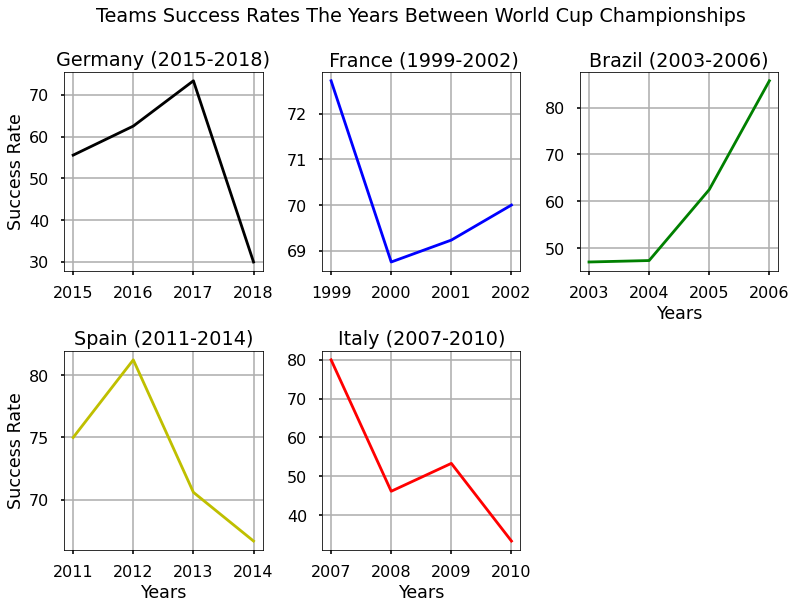

In [17]:
###################################################
#####         Teams Success Rates             #####
#####                  vs.                    #####
##### Matches Between World Cup Championships #####
###################################################

GER_matches = intl[(intl['Team'] == "Germany") & (intl['Year'] >= 2015) & ((intl['Year'] <= 2018))]
FRA_matches = intl[(intl['Team'] == "France") & (intl['Year'] >= 1999) & ((intl['Year'] <= 2002))]
BRA_matches = intl[(intl['Team'] == "Brazil") & (intl['Year'] >= 2003) & ((intl['Year'] <= 2006))]
ESP_matches = intl[(intl['Team'] == "Spain") & (intl['Year'] >= 2011) & ((intl['Year'] <= 2014))]
ITA_matches = intl[(intl['Team'] == "Italy") & (intl['Year'] >= 2007) & ((intl['Year'] <= 2010))]

fig = plt.figure()

# Germany Subplot
plt.subplot(231)
plt.title("Germany (2015-2018)")
plt.ylabel("Success Rate")
plt.grid(True)
plt.plot(GER_matches['Year'], GER_matches['Success Rate'], color="black")


# France Subplot
plt.subplot(232)
plt.title("Teams Success Rates The Years Between World Cup Championships\n\n France (1999-2002)")
plt.grid(True)
plt.plot(FRA_matches['Year'], FRA_matches['Success Rate'], 'b-')

# Brazil Subplot
plt.subplot(233)
plt.title("Brazil (2003-2006)")
plt.xlabel("Years")
plt.grid(True)
plt.plot(BRA_matches['Year'], BRA_matches['Success Rate'], 'g-')

# Spain Subplot
plt.subplot(234)
plt.title("Spain (2011-2014)")
plt.xlabel("Years")
plt.ylabel("Success Rate")
plt.grid(True)
plt.plot(ESP_matches['Year'], ESP_matches['Success Rate'], 'y-')

# Italy Subplot
plt.subplot(235)
plt.title("Italy (2007-2010)")
plt.xlabel("Years")
plt.grid(True)
plt.plot(ITA_matches['Year'], ITA_matches['Success Rate'], 'r-')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">These plots highly suggest that the cause of the "curse" lies somewhere between World Cup Championships. All teams see a steep decline in success rates in matches between World Cups they've won, and World Cups where they were affected by the curse. Except for Brazil, of course. As a reminder, Brazil was the only team that wasn't affected by the curse in 2002. They managed to reach the Round of 16 stage. The fact that thier success rate increases during international matches between World Cup championships only supports my theory even further.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Additionally, most teams appear to achieve their lowest success rates the year of the World Cup. This highly suggests that these team perform poorly in the qualification matches.</p>

<p align="left" style="font-size: 23px;"><b>Further Investigation: Teams Lineup</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Last plots found very interesting results. The problem could be in the years between World Cups, but why? To answer this question I would like to look into players of each team. The theory is that teams who suffer from poor performance in between World Cups rely heavily on old (and "safe") players and do not look for younger, skilled players from team's respective minor league.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">I found a dataset for team's lineup for every World Cup match (Source: <a href="https://www.kaggle.com/abecklas/fifa-world-cup">kaggle.com</a>) I will use that dataset to find out how much of the lineup does every team change before World Cup championships.</p>

In [18]:
# obtaining teams lineups for every World Cup championship
wc_players = pd.read_csv("WorldCupPlayers.csv")
wc_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">I will have to do a little bit of data tidying with this dataset. Because the data does not have year of the World Cup these players participated in, I have to find the matches using the "Match ID" column. I kept track of each Match ID in each team's individual World Cup data.</p>

In [19]:
# getting data of teams being studied
wc_players = wc_players[(wc_players['Team Initials'] == "GER") |
                       (wc_players['Team Initials'] == "FRA") |
                       (wc_players['Team Initials'] == "BRA") |
                       (wc_players['Team Initials'] == "ESP") |
                       (wc_players['Team Initials'] == "ITA")]
wc_players.sample(8)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
16734,308,643,ITA,BEARZOT Enzo (ITA),S,1,Giovanni GALLI,GK,NaN
24949,1025,8781,FRA,JACQUET Aime (FRA),N,4,Patrick VIEIRA,NaN,NaN
33289,249722,300061491,ESP,DEL BOSQUE Vicente (ESP),S,9,TORRES,NaN,O55'
20712,337,3060,GER,VOGTS Berti (GER),S,14,Thomas BERTHOLD,NaN,NaN
30953,97410300,97410060,BRA,PARREIRA Carlos Alberto (BRA),N,5,EMERSON,NaN,NaN
25296,43950100,43950001,FRA,LEMERRE Roger (FRA),N,1,RAME,GK,NaN
36656,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),N,1,JEFFERSON,GK,NaN
36155,255931,300186469,GER,LOEW Joachim (GER),N,2,GRO�KREUTZ,NaN,NaN


<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Due to the nature of championships and the rules of player exchanges, I probably need only one match from every championship to get the lineup of the team in the entire championship. I will test this to make sure that between matches of the same year, the lineup is the same.</p>

In [20]:
# getting information of players from two diffrent GER matches in 2014
test1 = wc_players[(wc_players['MatchID'] == 300186501) & (wc_players['Team Initials'] == "GER")].drop_duplicates().sort_values(by="Player Name")
test2 = wc_players[(wc_players['MatchID'] == 300186469) & (wc_players['Team Initials'] == "GER")].drop_duplicates().sort_values(by="Player Name")

# comparing names
test1["Player Name"].values == test2['Player Name'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [21]:
# getting information of players from two diffrent FRA matches in 1998
test1 = wc_players[(wc_players['MatchID'] == 8730) & (wc_players['Team Initials'] == "FRA")].drop_duplicates().sort_values(by="Player Name")
test2 = wc_players[(wc_players['MatchID'] == 8788) & (wc_players['Team Initials'] == "FRA")].drop_duplicates().sort_values(by="Player Name").sort_values(by="Player Name")

# comparing names
test1["Player Name"].values == test2['Player Name'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Results from the tests show that I indeed need only one match from every year to get the entire lineup of every team.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">This means I only need to get players information of every team from two matches in different World Cup championships (the World Cup the team had won, and the World Cup the team had lost due to the "curse"). Unfortunately, the dataset does not include Germany's lineup in 2018 World Cup, so I will have to exclude them from this analysis.</p>

In [22]:
###########################################################
##### Players Information for FRA, BRA, ESP, and ITA ######
###########################################################

# getting matched IDs
FRA_matchIDs = [FRA_wc[(FRA_wc['Year'] == 1998)]["MatchID"].values[0], FRA_wc[(FRA_wc['Year'] == 2002)]["MatchID"].values[0]]
BRA_matchIDs = [BRA_wc[(BRA_wc['Year'] == 2002)]["MatchID"].values[0], BRA_wc[(BRA_wc['Year'] == 2006)]["MatchID"].values[0]]
ESP_matchIDs = [ESP_wc[(ESP_wc['Year'] == 2010)]["MatchID"].values[0], ESP_wc[(ESP_wc['Year'] == 2014)]["MatchID"].values[0]]
ITA_matchIDs = [ITA_wc[(ITA_wc['Year'] == 2006)]["MatchID"].values[0], ITA_wc[(ITA_wc['Year'] == 2010)]["MatchID"].values[0]]
    
# getting players for every team using matches IDs
FRA_players = pd.DataFrame(wc_players[(wc_players['Team Initials'] == "FRA") & ((wc_players['MatchID'] == FRA_matchIDs[0]) | (wc_players['MatchID'] == FRA_matchIDs[1]))])
BRA_players = pd.DataFrame(wc_players[(wc_players['Team Initials'] == "BRA") & ((wc_players['MatchID'] == BRA_matchIDs[0]) | (wc_players['MatchID'] == BRA_matchIDs[1]))])
ESP_players = pd.DataFrame(wc_players[(wc_players['Team Initials'] == "ESP") & ((wc_players['MatchID'] == ESP_matchIDs[0]) | (wc_players['MatchID'] == ESP_matchIDs[1]))])
ITA_players = pd.DataFrame(wc_players[(wc_players['Team Initials'] == "ITA") & ((wc_players['MatchID'] == ITA_matchIDs[0]) | (wc_players['MatchID'] == ITA_matchIDs[1]))])

FRA_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
22722,1014,8730,FRA,JACQUET Aime (FRA),S,16,Fabien BARTHEZ,GK,NaN
22724,1014,8730,FRA,JACQUET Aime (FRA),S,3,Bixente LIZARAZU,NaN,NaN
22726,1014,8730,FRA,JACQUET Aime (FRA),S,5,L.BLANC,NaN,NaN
22728,1014,8730,FRA,JACQUET Aime (FRA),S,6,Youri DJORKAEFF,NaN,O84'
22730,1014,8730,FRA,JACQUET Aime (FRA),S,7,Didier DESCHAMPS,C,Y53'


<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now that I have the data on each teams players, I will need to do some further modifications. It appears that some players' names are formatted differently. So I need to reformat the names in 1998 to only include last name.</p>

In [23]:
# function for reformatting players names 

def nameFormat(data):
    for i, row in data.iterrows():           
        name = row['Player Name'].strip().split()
        if(len(name) == 2):
            data.loc[i, "Player Name"] = name[1]
        else:
            data.loc[i, "Player Name"] = name[0]
nameFormat(FRA_players)
nameFormat(BRA_players)
nameFormat(ESP_players)
nameFormat(ITA_players)

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now that all data formats and types are consistent, I will begin the process of analyzing the data. The plan is to find out how much the lineup has changed between matched from different World Cup championships for each team by comparing names.</p>

In [24]:
# function to count the number of players added and removed
def playersChanges(data): 
    names = {}
    changes = {}
    matchIDs = np.unique(data['MatchID'].values) 
    for id in matchIDs:
        names[id] = np.sort(np.asarray(data[data["MatchID"] == id]["Player Name"]))
    changes["Removed"] = len((set(names[matchIDs[0]]).difference(names[matchIDs[1]])))
    changes["Added"] = len((set(names[matchIDs[1]]).difference(names[matchIDs[0]])))
    return changes

FRA_changes = playersChanges(FRA_players)
BRA_changes = playersChanges(BRA_players)
ESP_changes = playersChanges(ESP_players)
ITA_changes = playersChanges(ITA_players)

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Next step is to visualize the data. I will create a bar plot for each team's number of players added and removed</p>

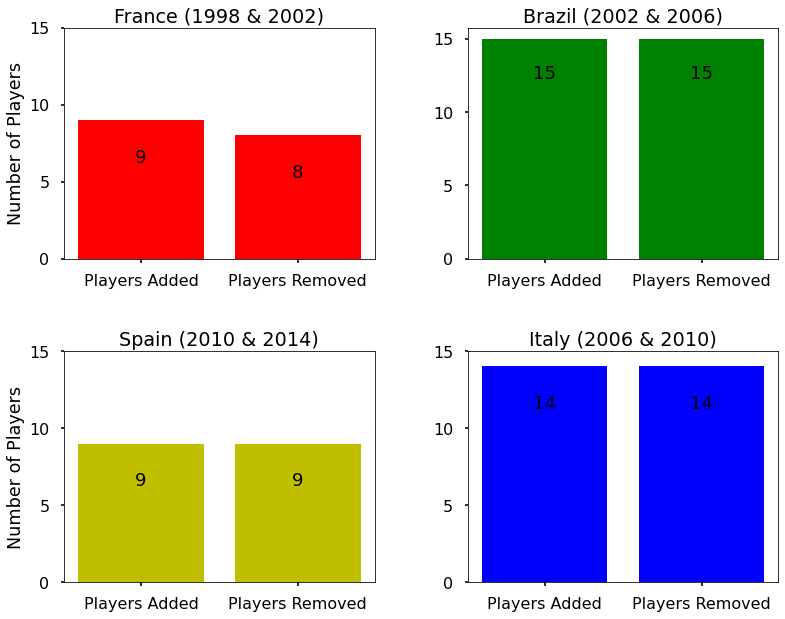

In [25]:
# creating bar plots

# function to label bars
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., h - 3, '%d'%int(h),
                ha='center', va='bottom', fontsize=18)

fig = plt.figure()
width = 0.27
labels = ["Players Added", "Players Removed"]

# France subplot
ax = fig.add_subplot(221)
ax.grid(False)
yvals = [FRA_changes['Added'], FRA_changes['Removed']]
bar1 = ax.bar(labels, yvals, color="r")
plt.title("France (1998 & 2002)")
plt.yticks([0, 5, 10, 15])
plt.ylabel("Number of Players")
autolabel(bar1)

# Brazil subplot
ax = fig.add_subplot(222)
ax.grid(False)
yvals = [BRA_changes['Added'], BRA_changes['Removed']]
bar2 = ax.bar(labels, yvals, color="g")
plt.title("Brazil (2002 & 2006)")
plt.yticks([0, 5, 10, 15])
autolabel(bar2)

# Spain subplot
ax = fig.add_subplot(223)
ax.grid(False)
yvals = [ESP_changes['Added'], ESP_changes['Removed']]
bar3 = ax.bar(labels, yvals, color="y")
plt.title("Spain (2010 & 2014)")
plt.ylabel("Number of Players")
plt.yticks([0, 5, 10, 15])
autolabel(bar3)

# Italy subplot
ax = fig.add_subplot(224)
ax.grid(False)
yvals = [ITA_changes['Added'], ITA_changes['Removed']]
bar4 = ax.bar(labels, yvals, color="b")
plt.title("Italy (2006 & 2010)")
plt.yticks([0, 5, 10, 15])
autolabel(bar4)

plt.subplots_adjust(hspace=0.4, wspace=0.3, top=1)
plt.show()

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">It seems like all teams always replaced players they remove. And all of them replaced a good number of them, particularly Brazil and Italy who replaced more than entire number of field players.</p>

<p align="left" style="font-size: 23px;"><b>Discussion</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Looking back at the results of analysis done in this project, it is strongly suggested that there's a strong correlation between teams' performance at international matches between World Cup championships, and World Cups at which the team is affected by the "World Cup Curse." The declining performance of teams that are affected by it (Germany, France, Spain, and Italy) and the fact that Brazil is the only team that had an improvement in performance (seeing as it is the only one team that hasn't been affected in the last 20 years), only support the theory of this project.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Further investigation found that most of these teams regularly change players in their teams and try to replace whoever they removed. Which means changing players may not be the reason these teams perform poorly in between World Cups, it could be the new players themselves. This would require further analysis with data I don't currently have (i.e. individual players performance). Future research about the "World Cup Curse" could look into this.</p>